In [ ]:
import pandas as pd     # Lectura de datos
import numpy as np      # Almacenar los datos en memoria y hacer diferentes operaciones
import matplotlib.pyplot as plt

# Keras: Librerias 
# Sequential, Dense, SGD: módulos
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

In [ ]:
datos = pd.read_csv('dataset.csv', sep=",", skiprows=32, usecols=[2,3])
datos

,Age,Systolic blood pressure
0,39,144
1,45,138
2,47,145
3,65,162
4,46,142
5,67,170
6,42,124
7,67,158
8,56,154
9,64,162


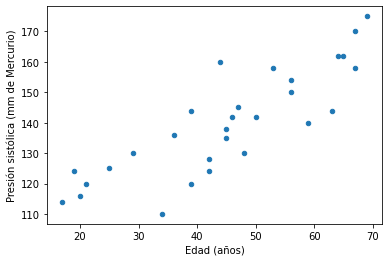

In [ ]:
# Al graficar los datos se observa una tendencia lineal
datos.plot.scatter(x='Age', y='Systolic blood pressure')
plt.xlabel('Edad (años)')
plt.ylabel('Presión sistólica (mm de Mercurio)')
plt.show()


In [ ]:
# Almacenando los valores en x e y
x = datos['Age'].values
y = datos['Systolic blood pressure'].values

**Crear el modelo en Keras**

In [ ]:
# - Capa de entrada: 1 dato (cada dato "x" correspondiente a la edad)
# - Capa de salida: 1 dato (cada dato "y" correspondiente a la regresión lineal)
# - Activación: 'linear' (pues se está implementando la regresión lineal)
np.random.seed(2)			# Para reproducibilidad del entrenamiento
input_dim = 1
output_dim = 1

In [ ]:
#  Sequential crea un objeto llamado "modelo"
# Pensemos en "modelo" como una caja generica por ahora vacia
# dependiendo de los elementos que le vaya agregando podra realizar la regresion lineal
# logistica, clasificacionde imagenes o analisis de sonido
modelo = Sequential() 

# "modelo" debe poseer la cantidad de los datos de entrada, de salida y el tipo de funcion de activacion
modelo.add(Dense(output_dim, input_dim=input_dim, activation='linear'))

In [ ]:
# Al algoritmo que busca disminuir el error SGD keras lo llama optimizador 
# Definición del método de optimización (algoritmo: gradiente descendiente sgd), con una
# tasa de aprendizaje (Learning Rate) de 0.0004 y una pérdida igual al error cuadrático medio
sgd = SGD(lr=0.0004)

# modelo.compile define el tipo de optimizador a usar
# la perdida ("loss") es el error cuadratico medio "mse"
modelo.compile(loss='mse', optimizer=sgd)

In [ ]:
# Imprimir en pantalla la información del modelo
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


**Entrenamiento: realizar la regresión lineal**

In [ ]:
# 40000 iteraciones y todos los datos de entrenamiento (29) se usarán en cada
# iteración (batch_size = 29), se puede elegir no usar todos

num_epochs = 40000
batch_size = x.shape[0]

# Usamos la funcion .fit 
# Definimos los datos x,y ,el numerode iteraciones (epochs), 
# el tamaño del lote (batch_size), verbose permite imprimir en pantalla cada una de las 
# iteraciones . verbose=0 quiere decir que no queremos imprimirla
history = modelo.fit(x, y, epochs=num_epochs, batch_size=batch_size, verbose=0)

**Visualizar resultados del entrenamiento**

In [ ]:
# Imprimir los coeficientes "w" y "b"
capas = modelo.layers[0]
w, b = capas.get_weights()
print('Parámetros: w = {:.1f}, b = {:.1f}'.format(w[0][0],b[0]))

Parámetros: w = 1.0, b = 93.5


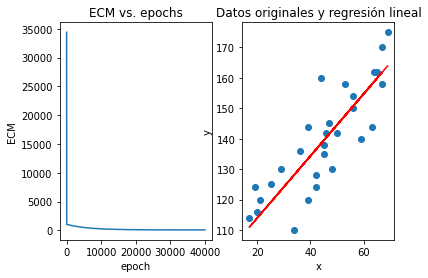

In [ ]:
# Graficar el error vs epochs y el resultado de la regresión
# superpuesto a los datos originales
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('ECM')
plt.title('ECM vs. epochs')

y_regr = modelo.predict(x)
plt.subplot(1, 2, 2)
plt.scatter(x,y)
plt.plot(x,y_regr,'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Datos originales y regresión lineal')
plt.show()

**Predicción**

In [ ]:
x_pred = np.array([90])
y_pred = modelo.predict(x_pred)
print("La presión sanguínea será de {:.1f} mm-Hg".format(y_pred[0][0]), " para una persona de {} años".format(x_pred[0]))

La presión sanguínea será de 185.3 mm-Hg  para una persona de 90 años
